<a href="https://colab.research.google.com/github/Liljekonvalj/bitbot-xl-test/blob/master/Kopia_av_OCEAN_ANALYSIS_PROCESS_NASA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
brsdincer_ocean_data_climate_change_nasa_path = kagglehub.dataset_download('brsdincer/ocean-data-climate-change-nasa')

print('Data source import complete.')


100%|██████████| 205M/205M [00:02<00:00, 94.0MB/s]

Extracting files...


Data source import complete.


# PACKAGES AND LIBRARIES

# HISTORY

* Ocean temperature trends and the thermal energy distribution in oceans dominate climate change. Land-based weather stations are invaluable for weather prediction, but they tell us very little about climate change. The common definition of climate is an overall change in temperature or precipitation over a period longer than 30 years. But even 30 years is a short timeframe, 100 years might be better. On this timescale, ocean temperature trends are more significant.

* Oceans cover 71% of Earth and they contain 99.93% of the thermal energy (“heat”) on the surface. Here we define the Earth’s surface as everything between the sea floor to the top of the atmosphere, ~22km. The land is considered below the surface here, we only include the atmosphere, lakes and rivers as part of the surface. As an illustration of the huge impact of the oceans, we should consider that Earth’s oceans contain more thermal energy than exists on the surface and in the atmosphere of Venus, where the temperature is 464°C or 867°F. In fact, Earth’s oceans contain four times more thermal energy than the atmosphere of Venus, yet the oceans have an average temperature of less than 5°C.

* At the ocean-air interface, temperatures change rapidly. The magnitude of the change and the thickness of the uppermost ocean affected is determined by cloudiness, whether it is night or day, and wind speed. This “skin” is thicker on calm cloudless days and thinner at night and on windy cloudy days. The temperature at the ocean-air interface (“SST”) is what is measured by radiometers and satellites. Unfortunately, the relationship between this temperature and the more stable mixed-layer temperature or “foundation” temperature is unknown. The relationship changes rapidly and is complicated.

* The atmosphere and the ocean are intimately connected. Ocean temperatures influence rainfall patterns throughout the world, so when ocean temperatures change, rainfall patterns tend to change as well. Scientists monitor changes in ocean temperatures, looking for warmer or cooler than average waters, to predict floods or droughts. For example, El Niño warms the equatorial Pacific Ocean off South America. The atmosphere becomes warmer and more humid over the eastern Pacific in response. Cascading atmospheric changes can shift the position of the jet stream, which then steers stronger winter storms to the southwestern United States. At the same time, El Niño cools the western Pacific, which usually results in less rain over Australia and Indonesia.

* The rainfall maps show total monthly rainfall in millimeters as recorded by NASA’s Tropical Rainfall Measuring Mission (TRMM) satellite. High rain totals are represented in dark blue, while small rainfall totals are shown in white. TRMM measures rainfall in the tropics. High-latitude regions, where TRMM does not record rainfall, are gray. The relationship between sea surface temperature anomaly and total rainfall is impossible to see in these maps because it is difficult to pick out small changes in total rainfall on a regional scale.

* The presence of sea ice influences the temperature and circulation patterns of both the atmosphere and the oceans.Sea ice reduces the amount of solar radiation absorbed at the ocean surface and, with the overlying snow cover, serves as an insulator, restricting exchanges of heat, momentum, and chemical constituents between the atmosphere and the ocean. Its large area coverage, 5% of the ocean surface, makes the sea ice cover a key parameter in the earth’s energy balance. The importance of obtaining climate data records of sea ice in the form of high-resolution validated global sea ice maps is highlighted by recent studies showing decade-scale changes in the global sea ice extent.

* Several authors have shown that the extent of sea ice in the Arctic has decreased since 1979 by 3% per decade, while in the Southern Ocean the extent of sea ice increased 1% per decade from 1979 to 1998. More recently, from an analysis of a 30-year sea ice record, the rate of decrease in Arctic sea ice was found to be 20% greater since 1979 than since 1971, while the overall trend in the Antarctic was found to be negative over the 30-year period as a result of anomalously large ice extents in the early 1970s.

* Two classes of sensors microwave and multispectral radiometers—are typically used for global mapping of sea ice extent, concentration, type, and temperature. MODIS is an imaging spectroradiometer that provides imagery of the earth’s surface and clouds in 36 discrete, narrow spectral bands from approximately 0.4–14.0 m at resolutions ranging from 0.25–1 km at nadir.

In [6]:
import pandas as pd
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as mtpltcm
from mpl_toolkits.mplot3d import Axes3D
import random
import folium
from folium.plugins import HeatMap, HeatMapWithTime
from folium import plugins
!pip install netCDF4
from netCDF4 import Dataset
!pip install cartopy
import cartopy.crs as ccrs
!pip install pydub
import pydub
from scipy.io.wavfile import read, write
import librosa
import librosa.display
import IPython
from IPython.display import Audio
import scipy
import skimage
from IPython.display import HTML
import matplotlib.animation as animation
import PIL
from scipy import signal
from scipy.fft import fftshift
from mpl_toolkits.mplot3d import art3d
import os
import os.path
from pathlib import Path
import glob


from warnings import filterwarnings

filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning)
filterwarnings("ignore", category=UserWarning)
filterwarnings("ignore", category=RuntimeWarning)

# READING AND INFORMATIONS

In [11]:
PATH_2018 = "/content/tavg1_2d_ocn_Nx-202109201458output.17833.webform.nc4"
PATH_2021 = "/content/tavg1_2d_ocn_Nx-202109201500output.18042.webform.nc4"

In [17]:
import os
import pandas as pd
from netCDF4 import Dataset

#def Dataset(file_path)
#dataset = Dataset(file_path)
#return dataset

# Now, you can try opening the files with Dataset
READ_2018 = Dataset(PATH_2018)
READ_2021 = Dataset(PATH_2021)

In [18]:
READ_2018 = Dataset(PATH_2018)
READ_2021 = Dataset(PATH_2021)

In [19]:
READ_2018

<class 'netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: COARDS
    calendar: standard
    comments: File
    model: geos/das
    center: gsfc
    dimensions(sizes): time(24), longitude(1152), latitude(721)
    variables(dimensions): float64 time(time), float64 longitude(longitude), float64 latitude(latitude), float32 tdrop(time, latitude, longitude), float32 tbar(time, latitude, longitude), float32 tskinice(time, latitude, longitude), float32 rainocn(time, latitude, longitude), float32 delts(time, latitude, longitude)
    groups: 

In [20]:
READ_2021

<class 'netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: COARDS
    calendar: standard
    comments: File
    model: geos/das
    center: gsfc
    dimensions(sizes): time(24), longitude(1152), latitude(721)
    variables(dimensions): float64 time(time), float64 longitude(longitude), float64 latitude(latitude), float32 tdrop(time, latitude, longitude), float32 tbar(time, latitude, longitude), float32 tskinice(time, latitude, longitude), float32 rainocn(time, latitude, longitude), float32 delts(time, latitude, longitude)
    groups: 

In [21]:
print(READ_2018.variables.keys())

dict_keys(['time', 'longitude', 'latitude', 'tdrop', 'tbar', 'tskinice', 'rainocn', 'delts'])


In [22]:
print(READ_2021.variables.keys())

dict_keys(['time', 'longitude', 'latitude', 'tdrop', 'tbar', 'tskinice', 'rainocn', 'delts'])


In [23]:
GENERAL_KEY_LIST = ['tdrop', 'tbar', 'tskinice', 'rainocn', 'delts']
YEAR_NAME_LIST = ["2018","2021"]

In [24]:
print(READ_2018.variables["longitude"].shape)
print(READ_2021.variables["longitude"].shape)

(1152,)
(1152,)


In [25]:
print(READ_2018.variables["latitude"].shape)
print(READ_2021.variables["latitude"].shape)

(721,)
(721,)


In [26]:
print(READ_2018.variables["time"].shape)
print(READ_2021.variables["time"].shape)

(24,)
(24,)


In [27]:
for x_params in GENERAL_KEY_LIST:
    print(x_params)
    print(READ_2018.variables[x_params].dimensions)
    print("\n")

tdrop
('time', 'latitude', 'longitude')


tbar
('time', 'latitude', 'longitude')


tskinice
('time', 'latitude', 'longitude')


rainocn
('time', 'latitude', 'longitude')


delts
('time', 'latitude', 'longitude')




In [28]:
for x_params in GENERAL_KEY_LIST:
    print(x_params)
    print(READ_2021.variables[x_params].dimensions)
    print("\n")

tdrop
('time', 'latitude', 'longitude')


tbar
('time', 'latitude', 'longitude')


tskinice
('time', 'latitude', 'longitude')


rainocn
('time', 'latitude', 'longitude')


delts
('time', 'latitude', 'longitude')




In [29]:
for x_params in GENERAL_KEY_LIST:
    print(x_params)
    print(READ_2018.variables[x_params].shape)
    print("\n")

tdrop
(24, 721, 1152)


tbar
(24, 721, 1152)


tskinice
(24, 721, 1152)


rainocn
(24, 721, 1152)


delts
(24, 721, 1152)




In [30]:
for x_params in GENERAL_KEY_LIST:
    print(x_params)
    print(READ_2021.variables[x_params].shape)
    print("\n")

tdrop
(24, 721, 1152)


tbar
(24, 721, 1152)


tskinice
(24, 721, 1152)


rainocn
(24, 721, 1152)


delts
(24, 721, 1152)




In [31]:
for x_params in GENERAL_KEY_LIST:
    print(x_params)
    print(READ_2018.variables[x_params].long_name)
    print("\n")

tdrop
temperature_drop_across_cool_layer


tbar
mean_temperature_of_interface_layer


tskinice
sea_ice_skin_temperature


rainocn
ocean_rainfall


delts
change_of_surface_skin_temperature




In [32]:
for x_params in GENERAL_KEY_LIST:
    print(x_params)
    print(READ_2021.variables[x_params].long_name)
    print("\n")

tdrop
temperature_drop_across_cool_layer


tbar
mean_temperature_of_interface_layer


tskinice
sea_ice_skin_temperature


rainocn
ocean_rainfall


delts
change_of_surface_skin_temperature




In [33]:
for x_params in GENERAL_KEY_LIST:
    print(x_params)
    print(READ_2018.variables[x_params].datatype)
    print("\n")

tdrop
float32


tbar
float32


tskinice
float32


rainocn
float32


delts
float32




In [34]:
for x_params in GENERAL_KEY_LIST:
    print(x_params)
    print(READ_2021.variables[x_params].datatype)
    print("\n")

tdrop
float32


tbar
float32


tskinice
float32


rainocn
float32


delts
float32




In [35]:
for x_params in GENERAL_KEY_LIST:
    print(x_params)
    print(READ_2018.variables[x_params])
    print("\n")

tdrop
<class 'netCDF4.Variable'>
float32 tdrop(time, latitude, longitude)
    comments: Unknown1 variable comment
    long_name: temperature_drop_across_cool_layer
    units: 
    grid_name: grid01
    grid_type: linear
    level_description: Earth surface
    time_statistic: instantaneous
    missing_value: 1000000000000000.0
unlimited dimensions: time
current shape = (24, 721, 1152)
filling on, default _FillValue of 9.969209968386869e+36 used


tbar
<class 'netCDF4.Variable'>
float32 tbar(time, latitude, longitude)
    comments: Unknown1 variable comment
    long_name: mean_temperature_of_interface_layer
    units: 
    grid_name: grid01
    grid_type: linear
    level_description: Earth surface
    time_statistic: instantaneous
    missing_value: 1000000000000000.0
unlimited dimensions: time
current shape = (24, 721, 1152)
filling on, default _FillValue of 9.969209968386869e+36 used


tskinice
<class 'netCDF4.Variable'>
float32 tskinice(time, latitude, longitude)
    comments: Unkno

In [36]:
for x_params in GENERAL_KEY_LIST:
    print(x_params)
    print(READ_2021.variables[x_params])
    print("\n")

tdrop
<class 'netCDF4.Variable'>
float32 tdrop(time, latitude, longitude)
    comments: Unknown1 variable comment
    long_name: temperature_drop_across_cool_layer
    units: 
    grid_name: grid01
    grid_type: linear
    level_description: Earth surface
    time_statistic: instantaneous
    missing_value: 1000000000000000.0
unlimited dimensions: time
current shape = (24, 721, 1152)
filling on, default _FillValue of 9.969209968386869e+36 used


tbar
<class 'netCDF4.Variable'>
float32 tbar(time, latitude, longitude)
    comments: Unknown1 variable comment
    long_name: mean_temperature_of_interface_layer
    units: 
    grid_name: grid01
    grid_type: linear
    level_description: Earth surface
    time_statistic: instantaneous
    missing_value: 1000000000000000.0
unlimited dimensions: time
current shape = (24, 721, 1152)
filling on, default _FillValue of 9.969209968386869e+36 used


tskinice
<class 'netCDF4.Variable'>
float32 tskinice(time, latitude, longitude)
    comments: Unkno

# ACCESS DATA

In [37]:
LON_2018 = READ_2018.variables["longitude"][:]
LAT_2018 = READ_2018.variables["latitude"][:]
TIME_2018 = READ_2018.variables["time"][:]
TDROP_2018 = READ_2018.variables["tdrop"][0,:,:]
TBAR_2018 = READ_2018.variables["tbar"][0,:,:]
TSKINICE_2018 = READ_2018.variables["tskinice"][0,:,:]
RAINOCN_2018 = READ_2018.variables["rainocn"][0,:,:]
DELTS_2018 = READ_2018.variables["delts"][0,:,:]


LON_2021 = READ_2021.variables["longitude"][:]
LAT_2021 = READ_2021.variables["latitude"][:]
TIME_2021 = READ_2021.variables["time"][:]
TDROP_2021 = READ_2021.variables["tdrop"][0,:,:]
TBAR_2021 = READ_2021.variables["tbar"][0,:,:]
TSKINICE_2021 = READ_2021.variables["tskinice"][0,:,:]
RAINOCN_2021 = READ_2021.variables["rainocn"][0,:,:]
DELTS_2021 = READ_2021.variables["delts"][0,:,:]

In [38]:
LAT_TDROP_2018 = TDROP_2018[:,0]
LON_TDROP_2018 = TDROP_2018[0,:]

LAT_TBAR_2018 = TBAR_2018[:,0]
LON_TBAR_2018 = TBAR_2018[0,:]

LAT_TSKINICE_2018 = TSKINICE_2018[:,0]
LON_TSKINICE_2018 = TSKINICE_2018[0,:]

LAT_RAINOCN_2018 = RAINOCN_2018[:,0]
LON_RAINOCN_2018 = RAINOCN_2018[0,:]

LAT_DELTS_2018 = DELTS_2018[:,0]
LON_DELTS_2018 = DELTS_2018[0,:]



LAT_TDROP_2021 = TDROP_2021[:,0]
LON_TDROP_2021 = TDROP_2021[0,:]

LAT_TBAR_2021 = TBAR_2021[:,0]
LON_TBAR_2021 = TBAR_2021[0,:]

LAT_TSKINICE_2021 = TSKINICE_2021[:,0]
LON_TSKINICE_2021 = TSKINICE_2021[0,:]

LAT_RAINOCN_2021 = RAINOCN_2021[:,0]
LON_RAINOCN_2021 = RAINOCN_2021[0,:]

LAT_DELTS_2021 = DELTS_2021[:,0]
LON_DELTS_2021 = DELTS_2021[0,:]

# MAPPING

In [39]:
GENERAL_PARAMS_2018 = [TDROP_2018,TBAR_2018,TSKINICE_2018,RAINOCN_2018,DELTS_2018]
GENERAL_PARAMS_2021 = [TDROP_2021,TBAR_2021,TSKINICE_2021,RAINOCN_2021,DELTS_2021]

In [40]:
plt.style.use("dark_background")

/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


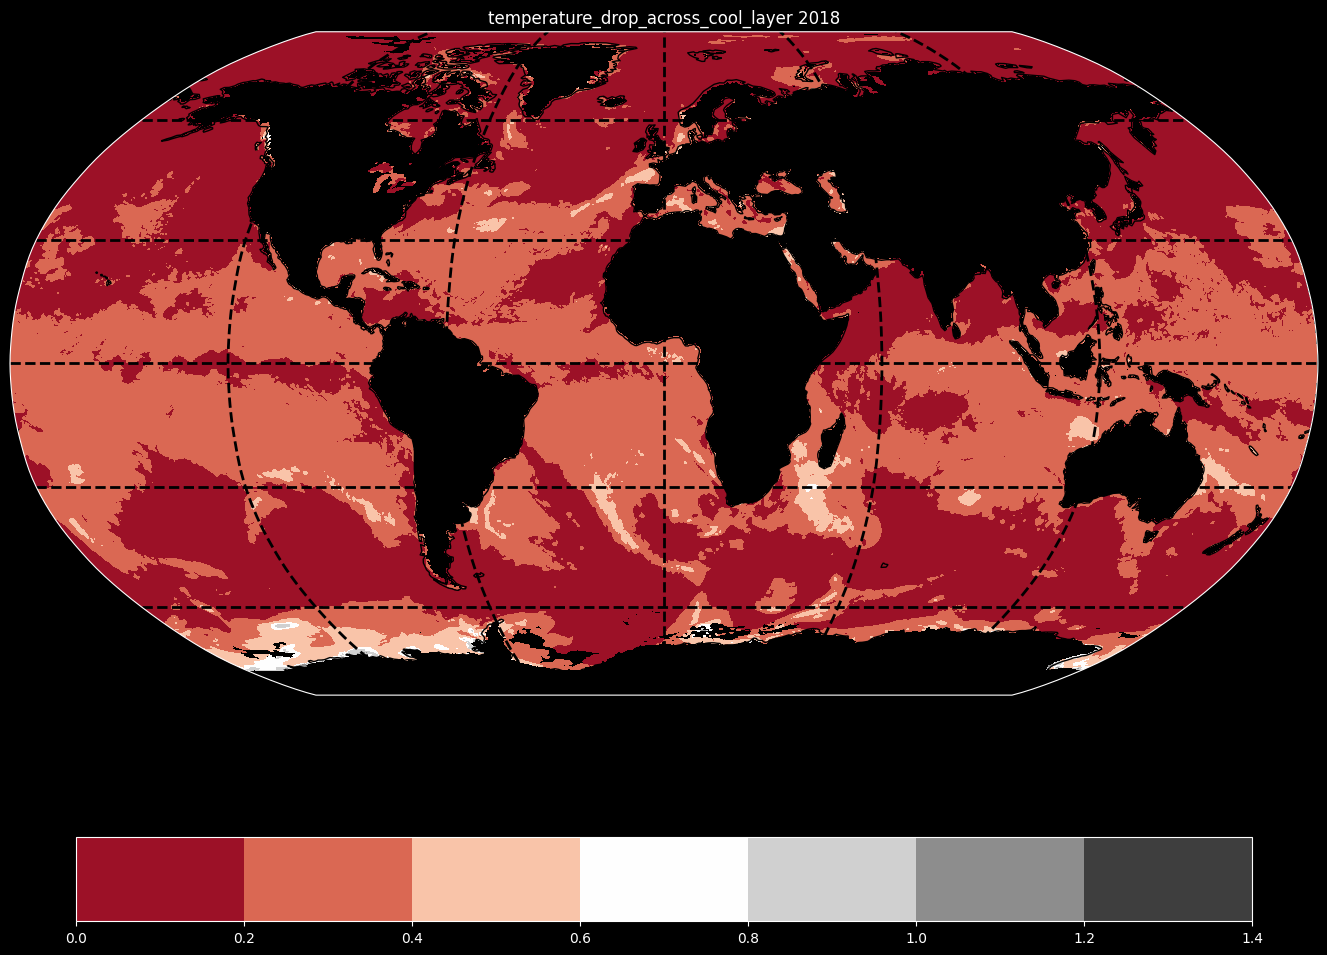

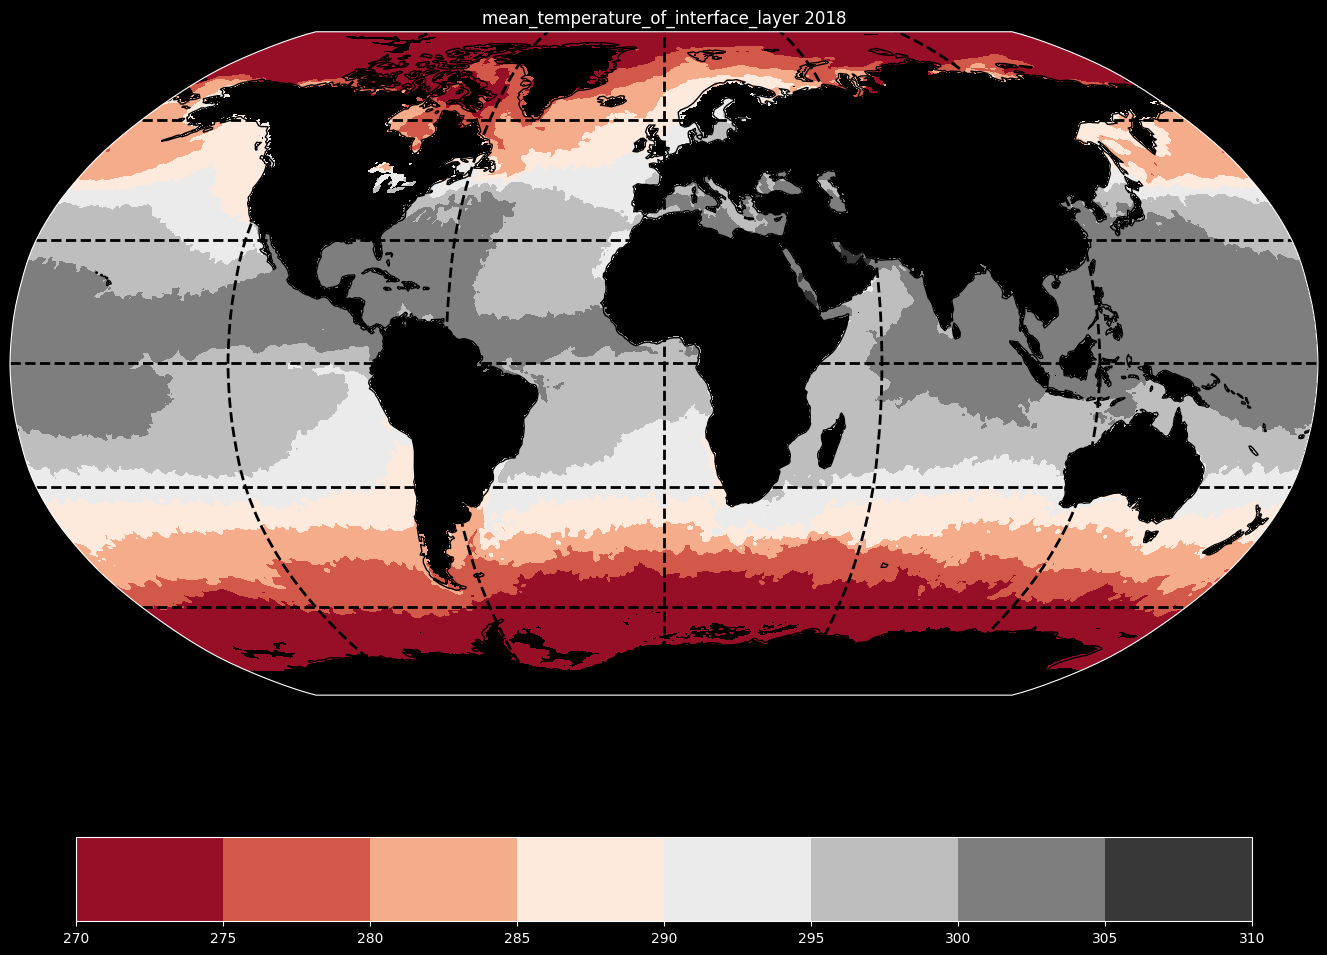

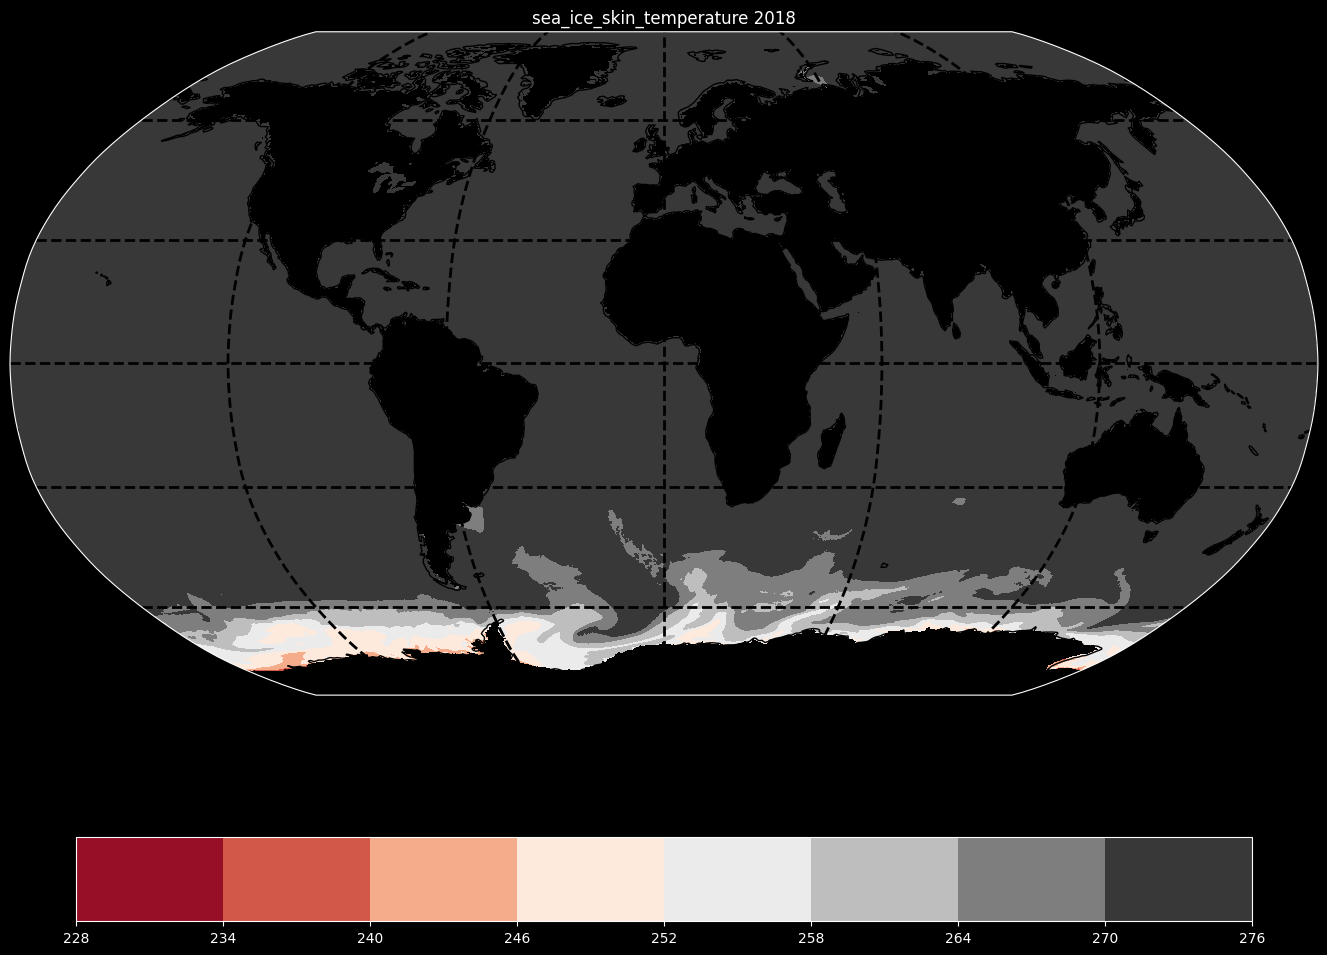

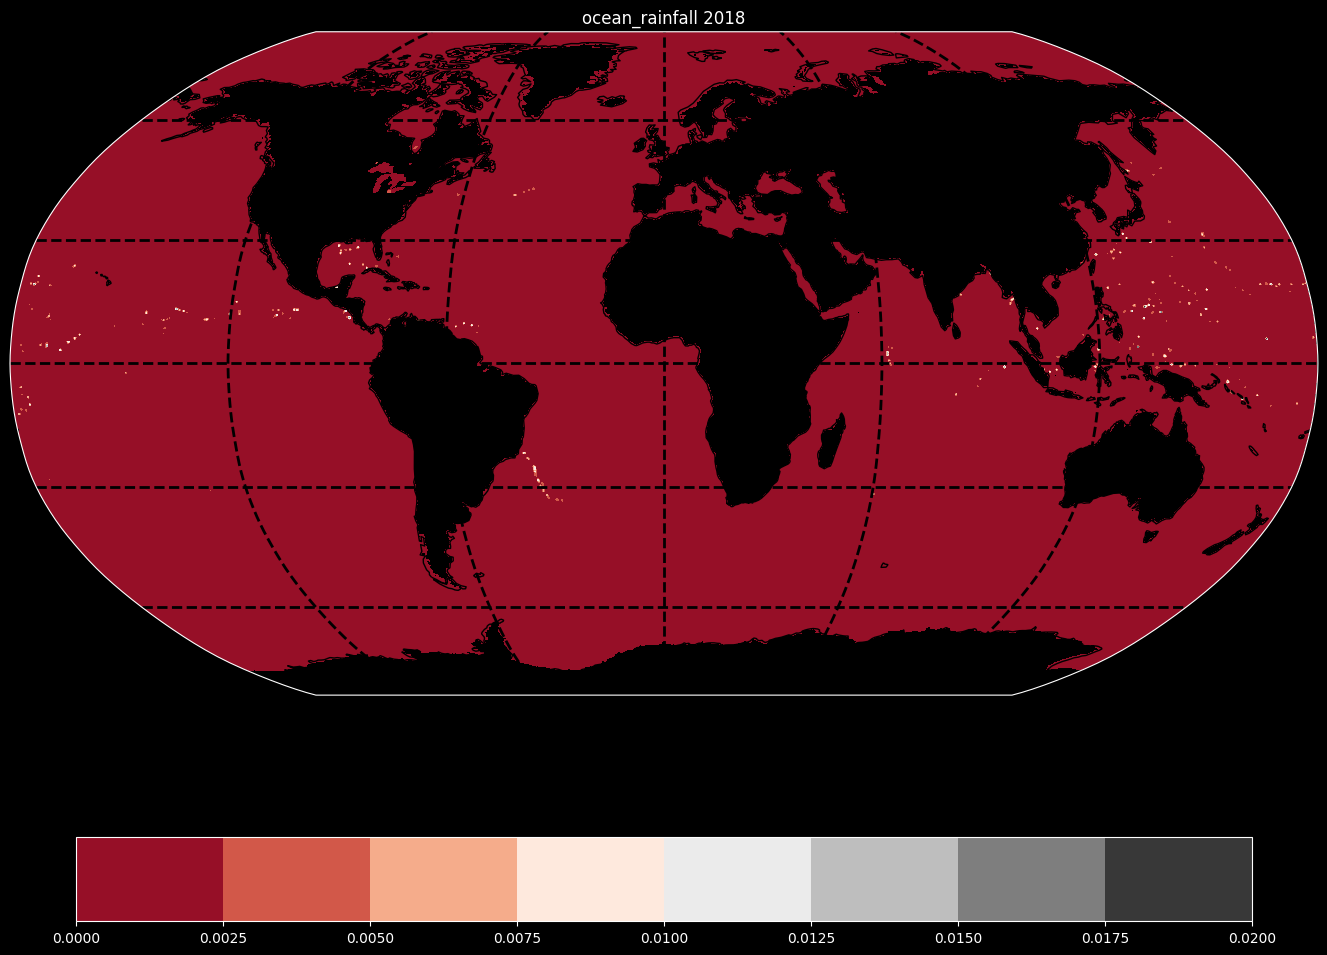

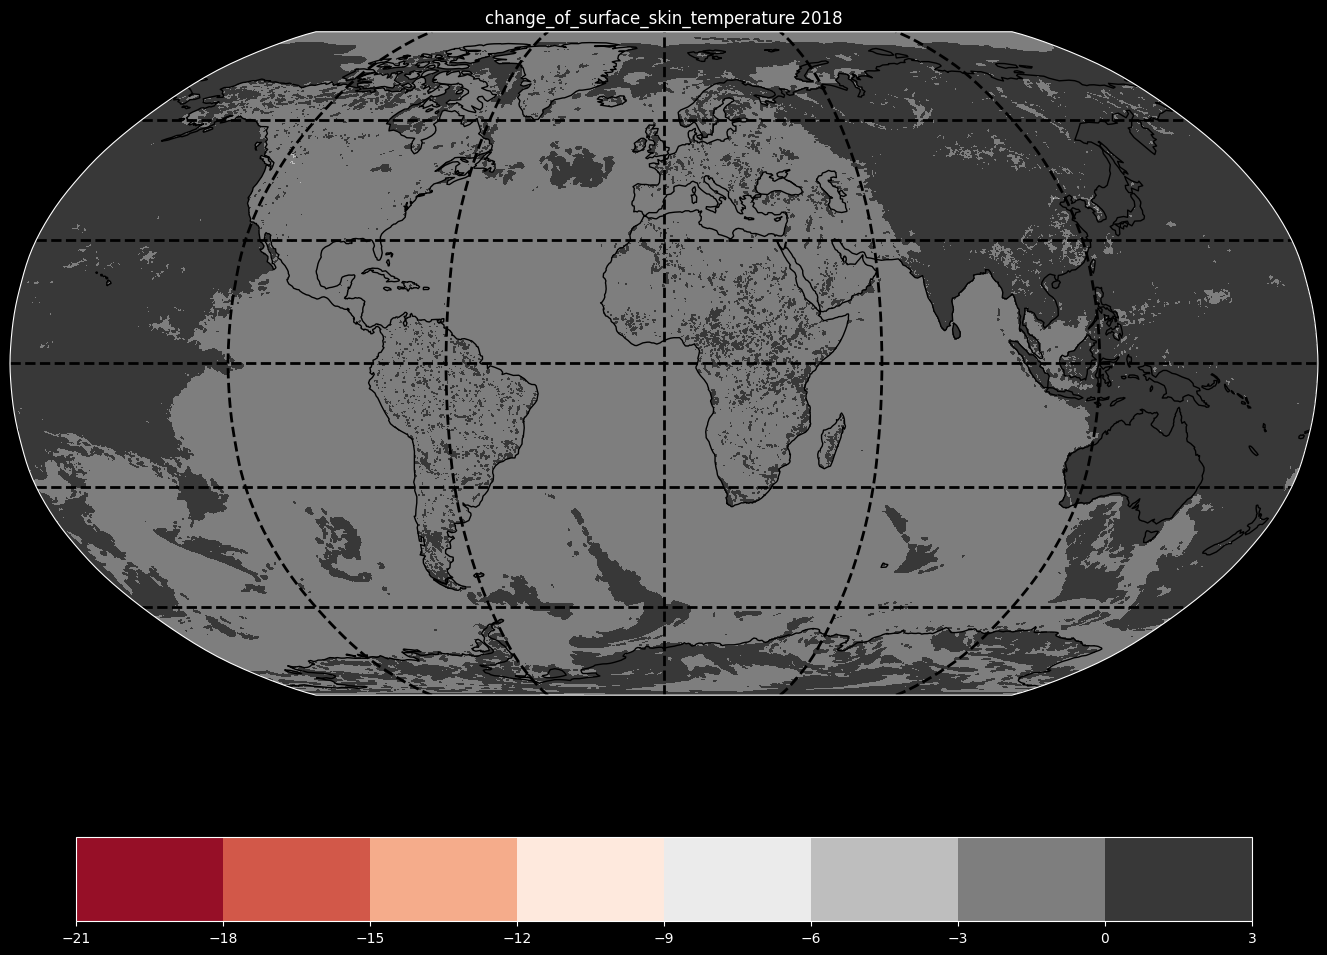

In [41]:
for x_climate_params,x_params_name in zip(GENERAL_PARAMS_2018,GENERAL_KEY_LIST):


    figure = plt.figure(figsize=(15,10))

    axis_func = plt.axes(projection=ccrs.Robinson())
    axis_func.set_global()
    axis_func.coastlines(resolution="110m",linewidth=1)
    axis_func.gridlines(linestyle='--',color='black',linewidth=2)

    plt.contourf(LON_2018, LAT_2018, x_climate_params, transform=ccrs.PlateCarree(),cmap="RdGy")
    color_bar_func = plt.colorbar(ax=axis_func, orientation="horizontal",aspect=14, shrink=0.8, extend="max")
    color_bar_func.ax.tick_params(labelsize=10)

    plt.title(READ_2018.variables[x_params_name].long_name + " " + "2018")
    plt.tight_layout()
    plt.show()

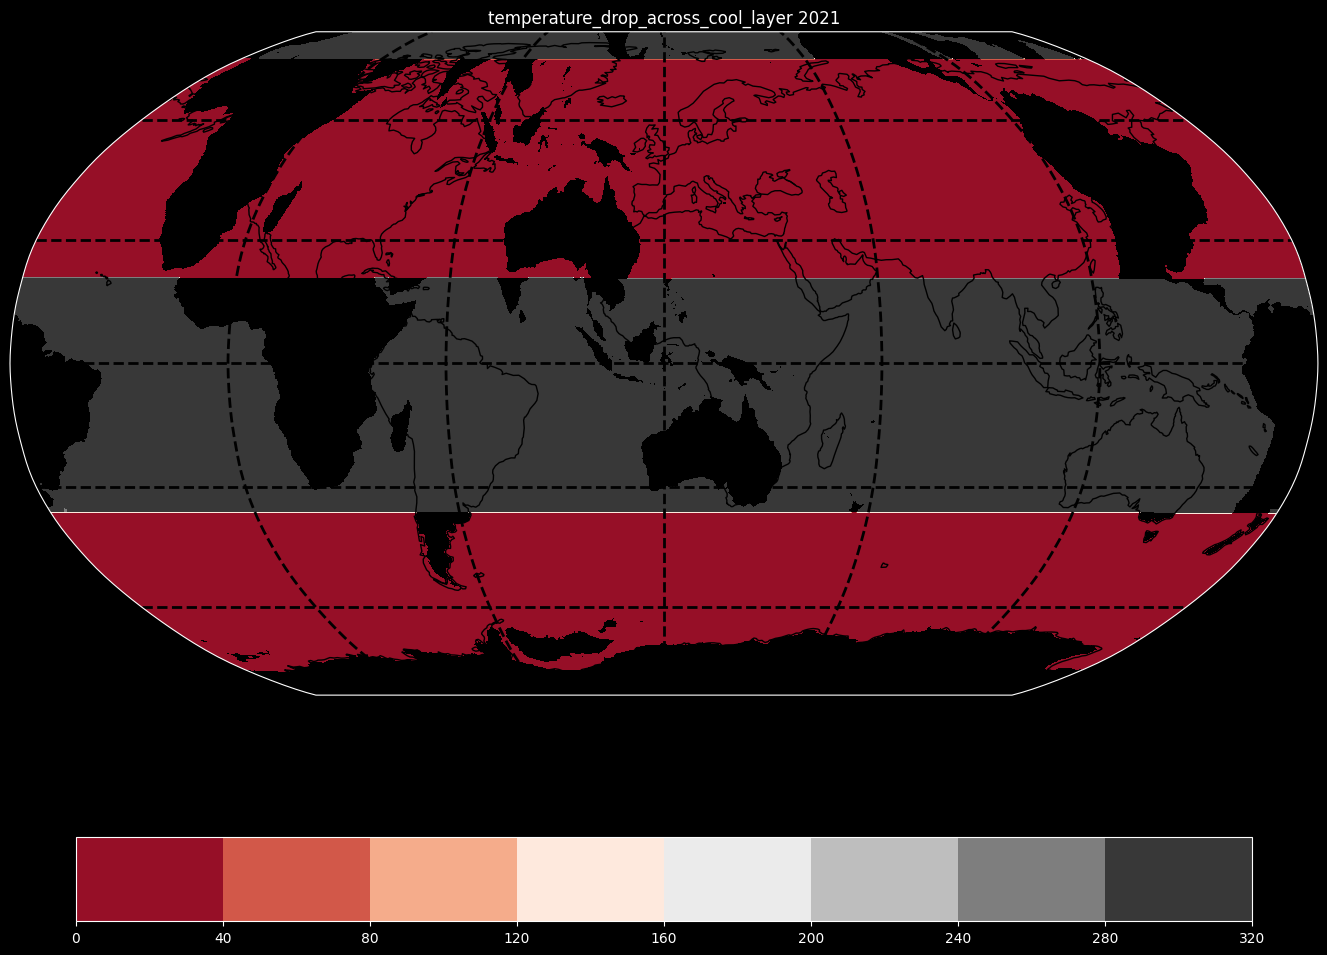

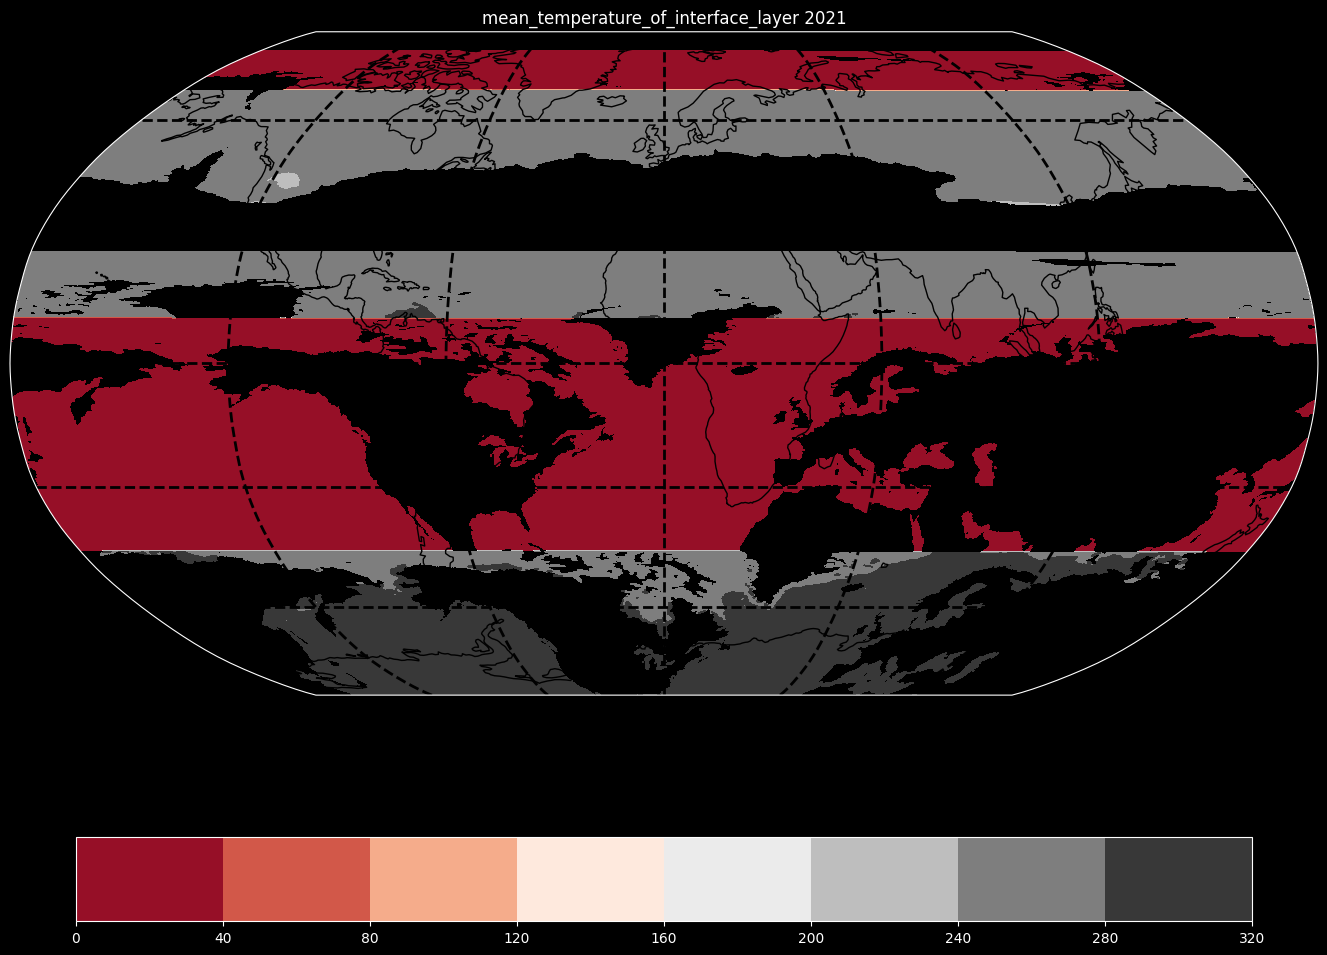

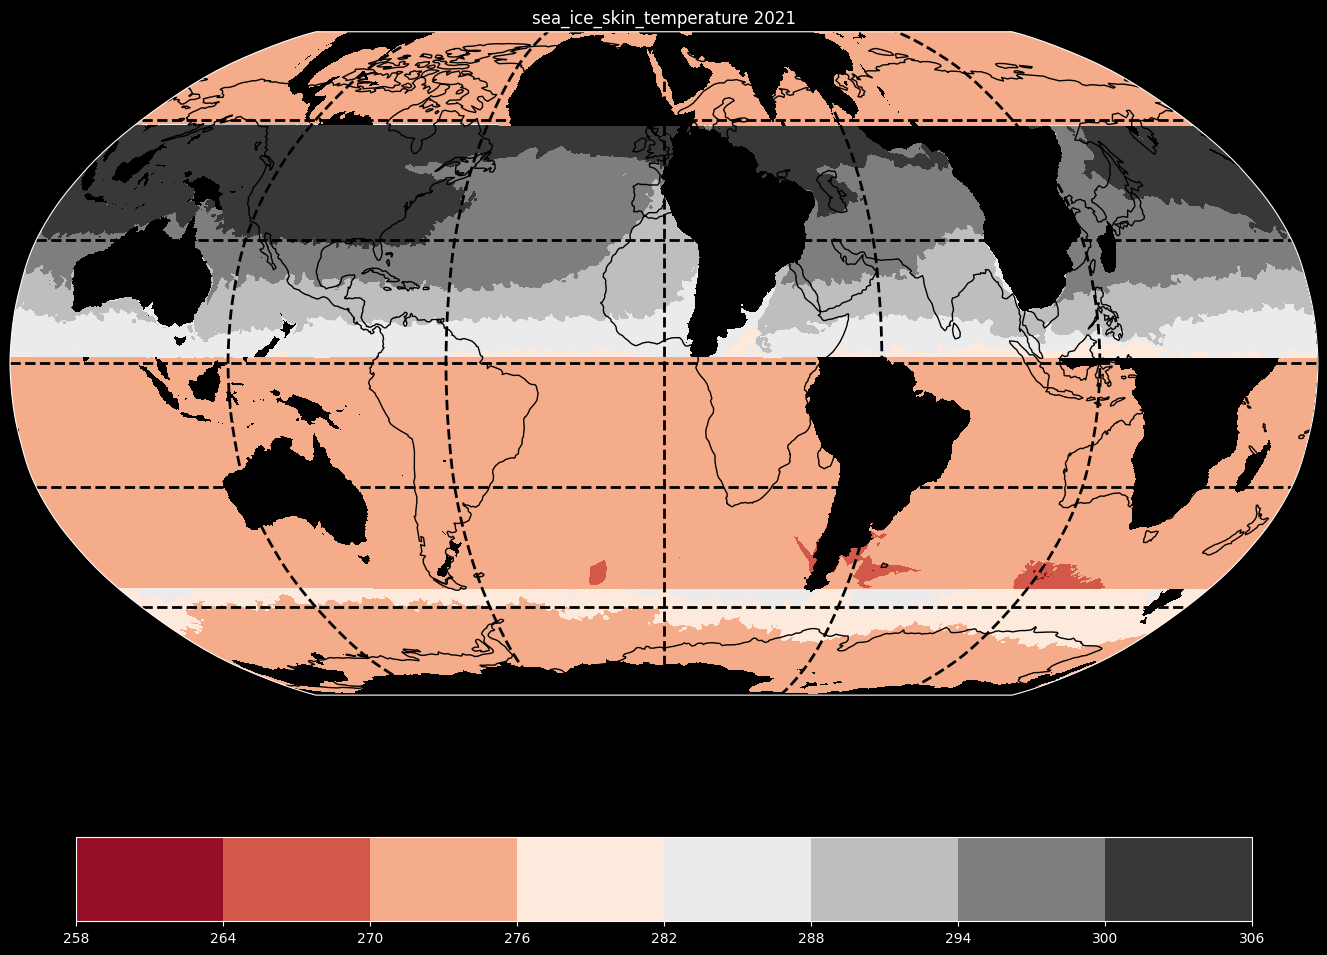

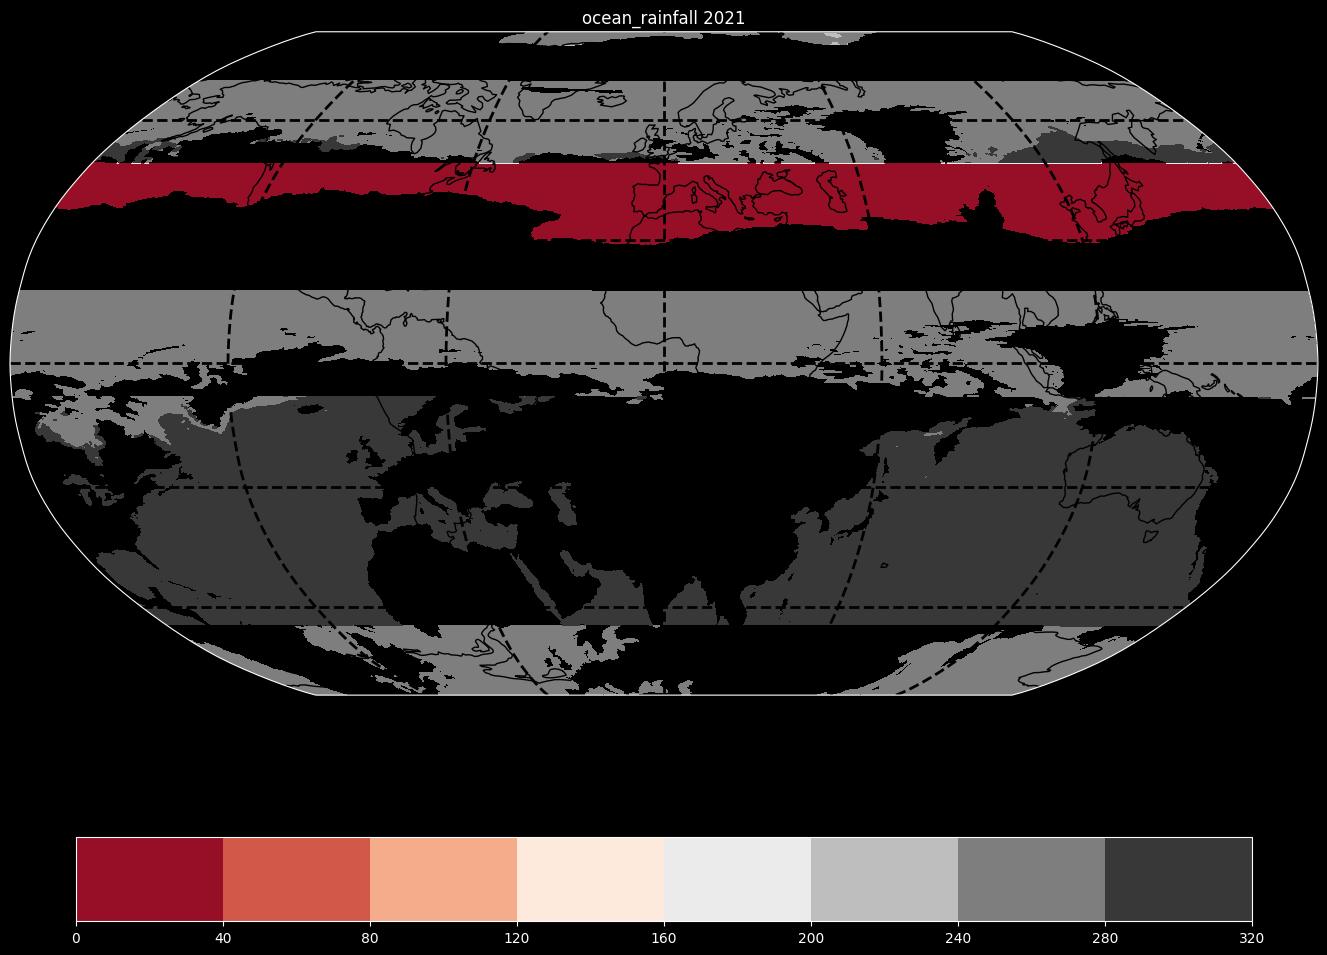

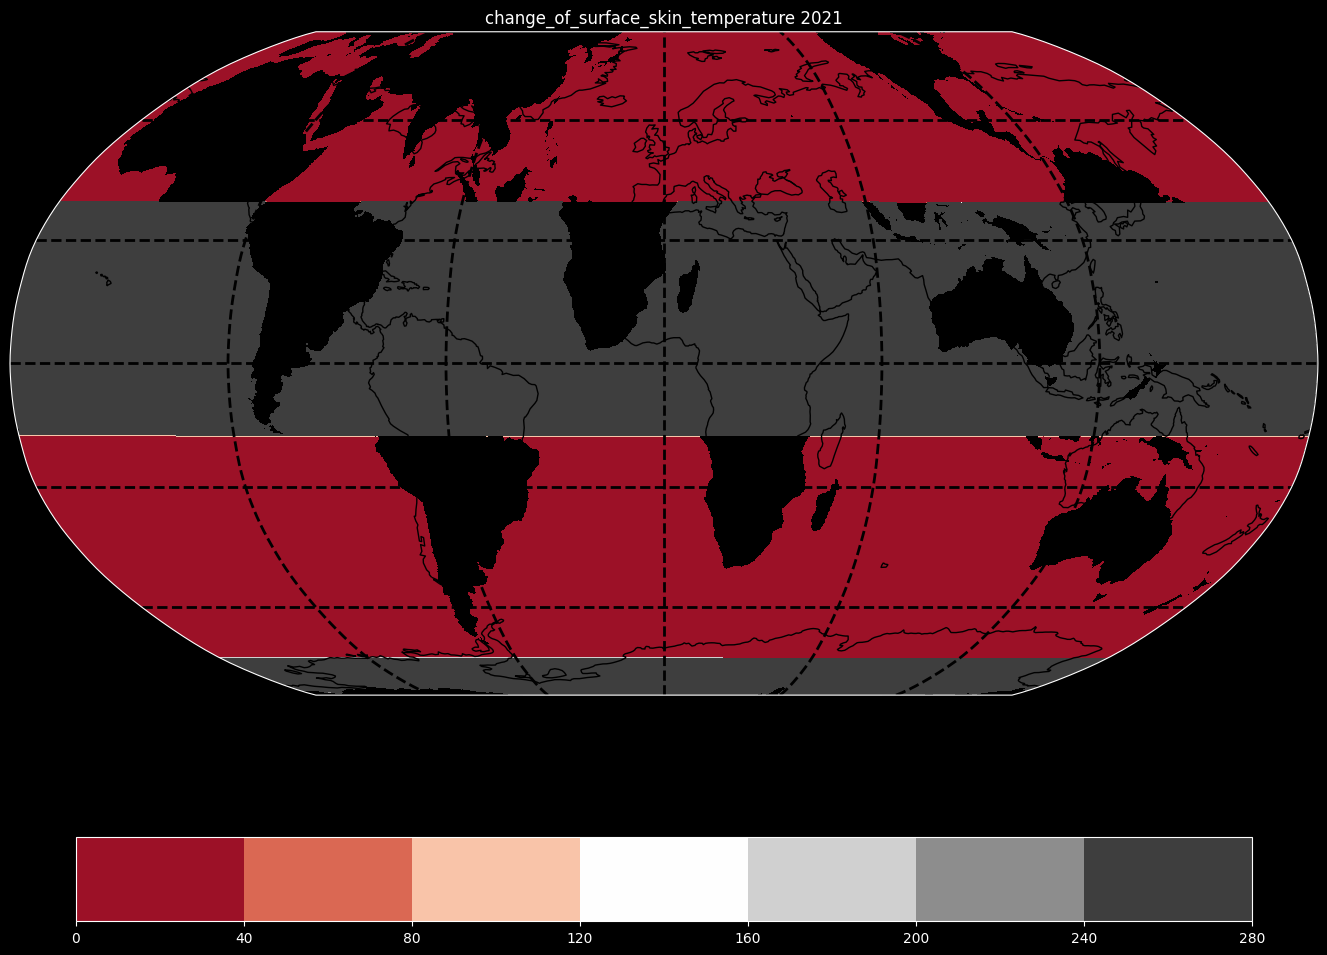

In [42]:
for x_climate_params,x_params_name in zip(GENERAL_PARAMS_2021,GENERAL_KEY_LIST):


    figure = plt.figure(figsize=(15,10))

    axis_func = plt.axes(projection=ccrs.Robinson())
    axis_func.set_global()
    axis_func.coastlines(resolution="110m",linewidth=1)
    axis_func.gridlines(linestyle='--',color='black',linewidth=2)

    plt.contourf(LON_2021, LAT_2021, x_climate_params, transform=ccrs.PlateCarree(),cmap="RdGy")
    color_bar_func = plt.colorbar(ax=axis_func, orientation="horizontal",aspect=14, shrink=0.8, extend="max")
    color_bar_func.ax.tick_params(labelsize=10)

    plt.title(READ_2021.variables[x_params_name].long_name + " " + "2021")
    plt.tight_layout()
    plt.show()

In [ ]:
for x_climate_params_2021,x_climate_params_2018,x_params_name in zip(GENERAL_PARAMS_2021,GENERAL_PARAMS_2018,GENERAL_KEY_LIST):


    figure = plt.figure(figsize=(15,10))

    axis_func = plt.axes(projection=ccrs.Robinson())
    axis_func.set_global()
    axis_func.coastlines(resolution="110m",linewidth=1)
    axis_func.gridlines(linestyle='--',color='black',linewidth=2)

    plt.contourf(LON_2018, LAT_2018, x_climate_params_2018, transform=ccrs.PlateCarree(),cmap="RdGy")
    color_bar_func = plt.colorbar(ax=axis_func, orientation="horizontal",aspect=14, shrink=0.8, extend="max")
    color_bar_func.ax.tick_params(labelsize=10)

    plt.title(READ_2018.variables[x_params_name].long_name + " " + "2018")
    plt.tight_layout()
    plt.show()

    #
    figure = plt.figure(figsize=(15,10))

    axis_func = plt.axes(projection=ccrs.Robinson())
    axis_func.set_global()
    axis_func.coastlines(resolution="110m",linewidth=1)
    axis_func.gridlines(linestyle='--',color='black',linewidth=2)

    plt.contourf(LON_2021, LAT_2021, x_climate_params_2021, transform=ccrs.PlateCarree(),cmap="RdGy")
    color_bar_func = plt.colorbar(ax=axis_func, orientation="horizontal",aspect=14, shrink=0.8, extend="max")
    color_bar_func.ax.tick_params(labelsize=10)

    plt.title(READ_2021.variables[x_params_name].long_name + " " + "2021")


    plt.tight_layout()
    plt.show()

# PLOT

In [ ]:
LAT_2018_LIST = [LAT_TDROP_2018,LAT_TBAR_2018,LAT_TSKINICE_2018,LAT_RAINOCN_2018,LAT_DELTS_2018]
LON_2018_LIST = [LON_TDROP_2018,LON_TBAR_2018,LON_TSKINICE_2018,LON_RAINOCN_2018,LON_DELTS_2018]

LAT_2021_LIST = [LAT_TDROP_2021,LAT_TBAR_2021,LAT_TSKINICE_2021,LAT_RAINOCN_2021,LAT_DELTS_2021]
LON_2021_LIST = [LON_TDROP_2021,LON_TBAR_2021,LON_TSKINICE_2021,LON_RAINOCN_2021,LON_DELTS_2021]

In [ ]:
for x_params_name,x_lat_2018 in zip(GENERAL_KEY_LIST,LAT_2018_LIST):

    plt.figure(figsize=(18,7))

    plt.plot(x_lat_2018,color="red",label="latitude")

    plt.title(READ_2018.variables[x_params_name].long_name + " " + "2018")

    plt.tight_layout()
    plt.show()

In [ ]:
for x_params_name,x_lat_2021 in zip(GENERAL_KEY_LIST,LAT_2021_LIST):

    plt.figure(figsize=(18,7))

    plt.plot(x_lat_2021,color="red",label="latitude")

    plt.title(READ_2021.variables[x_params_name].long_name + " " + "2021")

    plt.tight_layout()
    plt.show()

In [ ]:
for x_params_name,x_lat_2021,x_lat_2018 in zip(GENERAL_KEY_LIST,LAT_2021_LIST,LAT_2018_LIST):

    plt.figure(figsize=(18,7))

    plt.plot(x_lat_2021,color="red",label="latitude 2021")
    plt.plot(x_lat_2018,color="yellow",label="latitude 2018")

    plt.title(READ_2021.variables[x_params_name].long_name + " " + "2021-2018")

    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
TDROP_PLOT_LIST = []

for i_count in range(len(READ_2018.variables["tdrop"][:,0,0])):

    plt.figure(figsize=(18,7))
    plt.title(READ_2018.variables["tdrop"].long_name + f" / TIME: {i_count}")

    plt.plot(READ_2018.variables["tdrop"][i_count,:,0],color="yellow",label="latitude-2018")
    plt.plot(READ_2021.variables["tdrop"][i_count,:,0],color="red",label="latitude-2021")

    plt.savefig(f"TDROP_PLOT_RESULT_{i_count}.jpg")
    NEW_READING_IMG = cv2.cvtColor(cv2.imread(f"TDROP_PLOT_RESULT_{i_count}.jpg"),cv2.COLOR_BGR2RGB)
    TDROP_PLOT_LIST.append(NEW_READING_IMG)

    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
def displaying_plot(source):

    figure = plt.figure(figsize=(16,11))

    Image_List = []
    plt.style.use("dark_background")
    for indexing in source:

        Read_IMG = plt.imshow(indexing, animated=True,cmap="hot")
        plt.axis('off')
        Image_List.append([Read_IMG])

    Animation_Func = animation.ArtistAnimation(figure, Image_List, interval=350, repeat_delay=10200)

    plt.close()

    return Animation_Func

In [ ]:
TBAR_PLOT_LIST = []

for i_count in range(len(READ_2018.variables["tbar"][:,0,0])):

    plt.figure(figsize=(18,7))
    plt.title(READ_2018.variables["tbar"].long_name + f" / TIME: {i_count}")

    plt.plot(READ_2018.variables["tbar"][i_count,:,0],color="yellow",label="latitude-2018")
    plt.plot(READ_2021.variables["tbar"][i_count,:,0],color="red",label="latitude-2021")

    plt.savefig(f"TBAR_PLOT_RESULT_{i_count}.jpg")
    NEW_READING_IMG = cv2.cvtColor(cv2.imread(f"TBAR_PLOT_RESULT_{i_count}.jpg"),cv2.COLOR_BGR2RGB)
    TBAR_PLOT_LIST.append(NEW_READING_IMG)

    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
HTML(displaying_plot(TBAR_PLOT_LIST).to_html5_video())

In [ ]:
TSKINICE_PLOT_LIST = []

for i_count in range(len(READ_2018.variables["tskinice"][:,0,0])):

    plt.figure(figsize=(18,7))
    plt.title(READ_2018.variables["tskinice"].long_name + f" / TIME: {i_count}")

    plt.plot(READ_2018.variables["tskinice"][i_count,:,0],color="yellow",label="latitude-2018")
    plt.plot(READ_2021.variables["tskinice"][i_count,:,0],color="red",label="latitude-2021")

    plt.savefig(f"TSKINICE_PLOT_RESULT_{i_count}.jpg")

    NEW_READING_IMG = cv2.cvtColor(cv2.imread(f"TSKINICE_PLOT_RESULT_{i_count}.jpg"),cv2.COLOR_BGR2RGB)
    TSKINICE_PLOT_LIST.append(NEW_READING_IMG)

    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
HTML(displaying_plot(TSKINICE_PLOT_LIST).to_html5_video())

In [ ]:
RAINOCN_PLOT_LIST = []

for i_count in range(len(READ_2018.variables["rainocn"][:,0,0])):

    plt.figure(figsize=(18,7))
    plt.title(READ_2018.variables["rainocn"].long_name + f" / TIME: {i_count}")

    plt.plot(READ_2018.variables["rainocn"][i_count,:,0],color="yellow",label="latitude-2018")
    plt.plot(READ_2021.variables["rainocn"][i_count,:,0],color="red",label="latitude-2021")

    plt.savefig(f"RAINOCN_PLOT_RESULT_{i_count}.jpg")

    NEW_READING_IMG = cv2.cvtColor(cv2.imread(f"RAINOCN_PLOT_RESULT_{i_count}.jpg"),cv2.COLOR_BGR2RGB)
    RAINOCN_PLOT_LIST.append(NEW_READING_IMG)

    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
HTML(displaying_plot(RAINOCN_PLOT_LIST).to_html5_video())

In [ ]:
DELTS_PLOT_LIST = []

for i_count in range(len(READ_2018.variables["delts"][:,0,0])):

    plt.figure(figsize=(18,7))
    plt.title(READ_2018.variables["delts"].long_name + f" / TIME: {i_count}")

    plt.plot(READ_2018.variables["delts"][i_count,:,0],color="yellow",label="latitude-2018")
    plt.plot(READ_2021.variables["delts"][i_count,:,0],color="red",label="latitude-2021")

    plt.savefig(f"DELTS_PLOT_RESULT_{i_count}.jpg")

    NEW_READING_IMG = cv2.cvtColor(cv2.imread(f"DELTS_PLOT_RESULT_{i_count}.jpg"),cv2.COLOR_BGR2RGB)
    DELTS_PLOT_LIST.append(NEW_READING_IMG)

    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
HTML(displaying_plot(DELTS_PLOT_LIST).to_html5_video())

# ANTARCTICA MAPPING

In [ ]:
for x_climate_params_2021,x_climate_params_2018,x_params_name in zip(GENERAL_PARAMS_2021,GENERAL_PARAMS_2018,GENERAL_KEY_LIST):


    figure = plt.figure(figsize=(15,10))

    axis_func = plt.axes(projection=ccrs.SouthPolarStereo())
    axis_func.set_global()
    axis_func.coastlines(resolution="110m",linewidth=1)
    axis_func.gridlines(linestyle='--',color='black',linewidth=2)

    axis_func.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())

    plt.contourf(LON_2018, LAT_2018, x_climate_params_2018, transform=ccrs.PlateCarree(),cmap="RdGy")

    color_bar_func = plt.colorbar(ax=axis_func, orientation="horizontal",aspect=14, shrink=0.8, extend="max")
    color_bar_func.ax.tick_params(labelsize=10)

    plt.title(READ_2018.variables[x_params_name].long_name + " " + "2018")
    plt.tight_layout()
    plt.show()

    #

    figure = plt.figure(figsize=(15,10))

    axis_func = plt.axes(projection=ccrs.SouthPolarStereo())
    axis_func.set_global()
    axis_func.coastlines(resolution="110m",linewidth=1)
    axis_func.gridlines(linestyle='--',color='black',linewidth=2)

    axis_func.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())

    plt.contourf(LON_2021, LAT_2021, x_climate_params_2021, transform=ccrs.PlateCarree(),cmap="RdGy")

    color_bar_func = plt.colorbar(ax=axis_func, orientation="horizontal",aspect=14, shrink=0.8, extend="max")
    color_bar_func.ax.tick_params(labelsize=10)

    plt.title(READ_2021.variables[x_params_name].long_name + " " + "2021")


    plt.tight_layout()
    plt.show()

In [ ]:
TSKINICE_IMG_LIST_2018 = []

for i_count in range(len(READ_2018.variables["tskinice"][:,0,0])):

    plt.figure(figsize=(18,7))
    plt.title(READ_2018.variables["tskinice"].long_name + f" / TIME: {i_count}")

    axis_func = plt.axes(projection=ccrs.SouthPolarStereo())
    axis_func.set_global()
    axis_func.coastlines(resolution="110m",linewidth=1)
    axis_func.gridlines(linestyle='--',color='black',linewidth=2)

    axis_func.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())

    plt.contourf(LON_2018, LAT_2018, READ_2018.variables["tskinice"][i_count,:,:], transform=ccrs.PlateCarree(),cmap="RdGy")

    color_bar_func = plt.colorbar(ax=axis_func, orientation="horizontal",aspect=14, shrink=0.8, extend="max")
    color_bar_func.ax.tick_params(labelsize=10)

    plt.savefig(f"TSKINICE_IMG_RESULT_2018_{i_count}.jpg")

    NEW_READING_IMG = cv2.cvtColor(cv2.imread(f"TSKINICE_IMG_RESULT_2018_{i_count}.jpg"),cv2.COLOR_BGR2RGB)
    TSKINICE_IMG_LIST_2018.append(NEW_READING_IMG)

    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
TSKINICE_IMG_LIST_2021 = []

for i_count in range(len(READ_2021.variables["tskinice"][:,0,0])):

    plt.figure(figsize=(18,7))
    plt.title(READ_2018.variables["tskinice"].long_name + f" / TIME: {i_count}")

    axis_func = plt.axes(projection=ccrs.SouthPolarStereo())
    axis_func.set_global()
    axis_func.coastlines(resolution="110m",linewidth=1)
    axis_func.gridlines(linestyle='--',color='black',linewidth=2)

    axis_func.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())

    plt.contourf(LON_2021, LAT_2021, READ_2021.variables["tskinice"][i_count,:,:], transform=ccrs.PlateCarree(),cmap="RdGy")

    color_bar_func = plt.colorbar(ax=axis_func, orientation="horizontal",aspect=14, shrink=0.8, extend="max")
    color_bar_func.ax.tick_params(labelsize=10)

    plt.savefig(f"TSKINICE_IMG_RESULT_2021_{i_count}.jpg")

    NEW_READING_IMG = cv2.cvtColor(cv2.imread(f"TSKINICE_IMG_RESULT_2021_{i_count}.jpg"),cv2.COLOR_BGR2RGB)
    TSKINICE_IMG_LIST_2021.append(NEW_READING_IMG)

    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
HTML(displaying_plot(TSKINICE_IMG_LIST_2018).to_html5_video())

In [ ]:
HTML(displaying_plot(TSKINICE_IMG_LIST_2021).to_html5_video())

# COMPARING

In [ ]:
GENERAL_PARAMS_2018 = [TDROP_2018,TBAR_2018,TSKINICE_2018,RAINOCN_2018,DELTS_2018]
GENERAL_PARAMS_2021 = [TDROP_2021,TBAR_2021,TSKINICE_2021,RAINOCN_2021,DELTS_2021]

In [ ]:
for x_2018,x_2021,x_name in zip(GENERAL_PARAMS_2018,GENERAL_PARAMS_2021,GENERAL_KEY_LIST):

    print("2018 MAX" + " " + READ_2018.variables[x_name].long_name)
    print("---"*5)
    print(x_2018.max())
    print("\n")

    print("2021 MAX" + " " + READ_2021.variables[x_name].long_name)
    print("---"*5)
    print(x_2021.max())
    print("\n")
    print("---"*15)
    print("\n")

In [ ]:
for x_2018,x_2021,x_name in zip(GENERAL_PARAMS_2018,GENERAL_PARAMS_2021,GENERAL_KEY_LIST):

    print("2018 MIN" + " " + READ_2018.variables[x_name].long_name)
    print("---"*5)
    print(x_2018.min())
    print("\n")

    print("2021 MIN" + " " + READ_2021.variables[x_name].long_name)
    print("---"*5)
    print(x_2021.min())
    print("\n")
    print("---"*15)
    print("\n")

In [ ]:
for x_2018,x_2021,x_name in zip(GENERAL_PARAMS_2018,GENERAL_PARAMS_2021,GENERAL_KEY_LIST):

    print("2018 MEAN" + " " + READ_2018.variables[x_name].long_name)
    print("---"*5)
    print(x_2018.mean())
    print("\n")

    print("2021 MEAN" + " " + READ_2021.variables[x_name].long_name)
    print("---"*5)
    print(x_2021.mean())
    print("\n")
    print("---"*15)
    print("\n")